In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Layer

In [ ]:
class IdentityBlock(tf.keras.Model):
  def __init__(self,filters,kernel_size):
    super(IdentityBlock,self).__init__(name='')
    self.conv1=tf.keras.layers.Conv2D(filters,kernel_size,padding='same')
    self.bn1=tf.keras.layers.BatchNormalization()
    self.conv2=tf.keras.layers.Conv2D(filters,kernel_size,padding='same')
    self.bn2=tf.keras.layers.BatchNormalization()
    self.act=tf.keras.layers.Activation('relu')
    self.add=tf.keras.layers.Add()
  def call(self,input_tensor):
    x=self.conv1(input_tensor)
    x=self.bn1(x)
    x=self.act(x)
    
    x=self.conv2(x)
    x=self.bn2(x)
    x=self.act(x)
    
    x=self.add([x,input_tensor])
    x=self.act(x)
    return x


In [ ]:
class ResNet(tf.keras.Model):
    def __init__(self, num_classes):
        super(ResNet, self).__init__()
        self.conv = tf.keras.layers.Conv2D(64, 7, padding='same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.act = tf.keras.layers.Activation('relu')
        self.max_pool = tf.keras.layers.MaxPool2D((3, 3))

        # Use the Identity blocks that you just defined
        self.id1a = IdentityBlock(64, 3)
        self.id1b = IdentityBlock(64, 3)

        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = self.act(x)
        x = self.max_pool(x)

        # insert the identity blocks in the middle of the network
        x = self.id1a(x)
        x = self.id1b(x)

        x = self.global_pool(x)
        return self.classifier(x)

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator()
# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))
import numpy as np
X_train=np.expand_dims(X_train,axis=3)
X_train.shape
X_test=np.expand_dims(X_test,axis=3)
X_test.shape
resnet = ResNet(10)
resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=resnet.fit(datagen.flow((X_train/255, Y_train) 
         ),validation_data=datagen.flow(X_test/255, Y_test),
        
         steps_per_epoch=len(X_train) / 32, epochs=10)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.1456 - accuracy: 0.9634 - val_loss: 0.0826 - val_accuracy: 0.9741
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0650 - val_accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.1005 - val_accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0424 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.0582 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/s

In [ ]:
resnet.summary()

Model: "res_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  3200      
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 activation (Activation)     multiple                  0         
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
  (IdentityBlock)            multiple                  74368     
                                                                 
  (IdentityBlock)            multiple                  7436

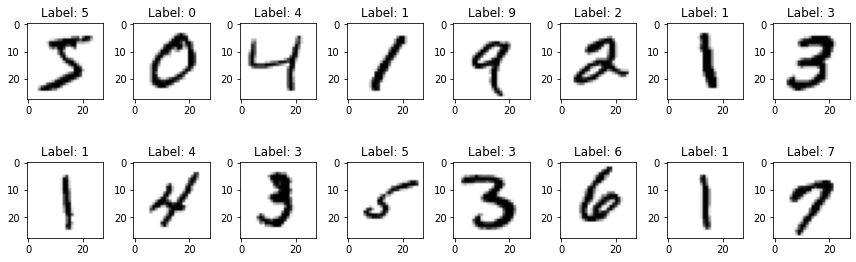

In [ ]:
# import matplotlib's pyplot library to visualize MNIST images
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline
# define number of images to show
num_row = 2
num_col = 8
num= num_row*num_col
# get images
images = X_train[0:num]
labels = Y_train[0:num]
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes[i//num_col, i%num_col]
     ax.imshow(images[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

BEFORE:



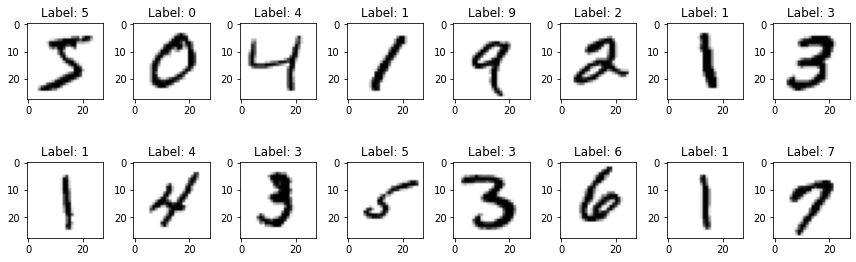

AFTER:



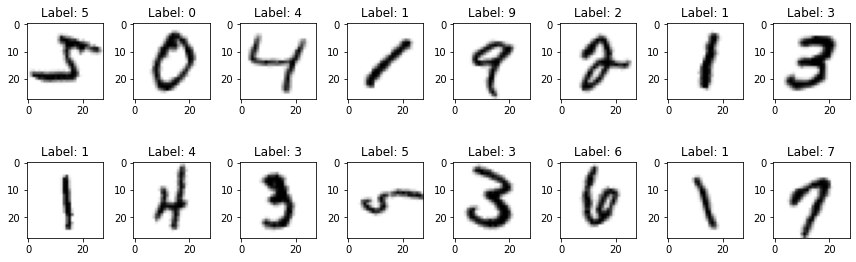

In [ ]:
# specify the maximum rotation_range angle
rotation_range_val = 30
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)
# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),Y_train.reshape(Y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

BEFORE:



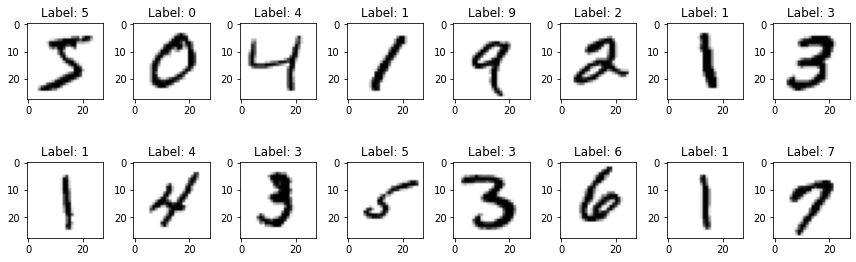

AFTER:



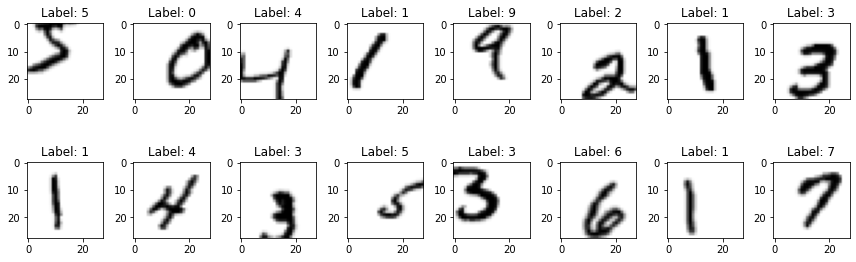

In [ ]:
# specify the width and height shift arguments
width_shift_val = 0.25
height_shift_val = 0.25
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=height_shift_val)
# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),Y_train.reshape(Y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

BEFORE:



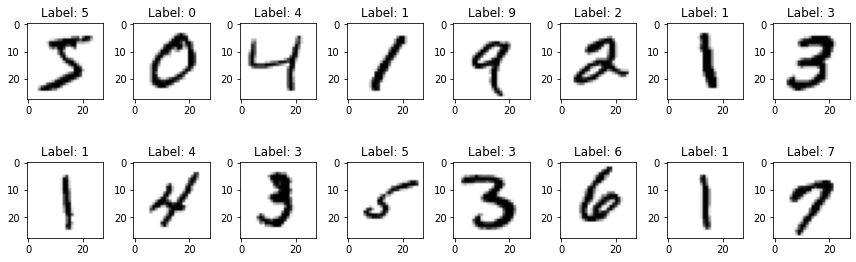

AFTER:



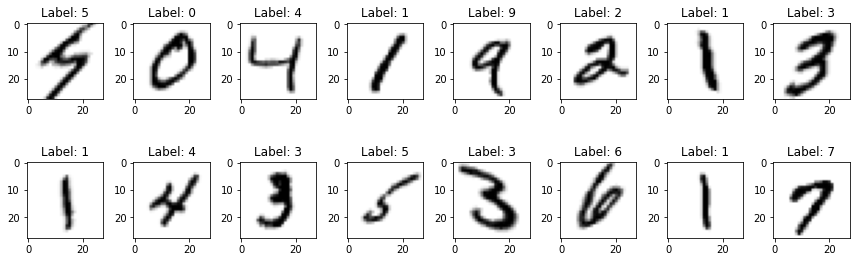

In [ ]:
# specify the shear argument
shear_range_val=45
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(shear_range=shear_range_val)
# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),Y_train.reshape(Y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

BEFORE:



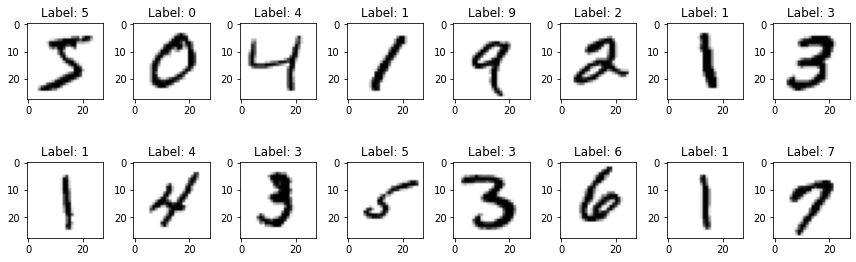

AFTER:



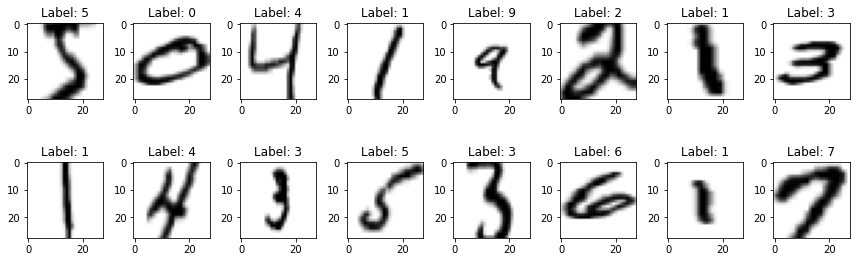

In [ ]:
# specify the zoom argument
zoom_range_val=[0.5,1.5]
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(zoom_range=zoom_range_val)
# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),Y_train.reshape(Y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()


BEFORE:



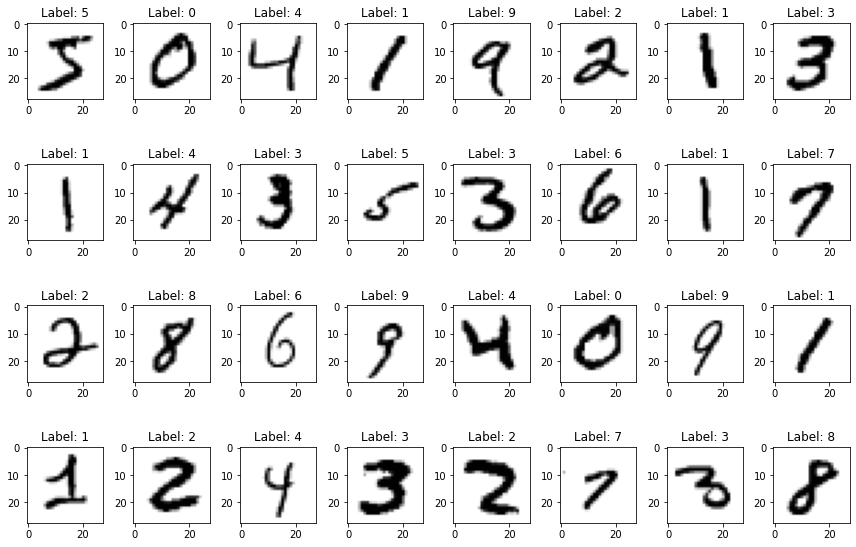

AFTER:



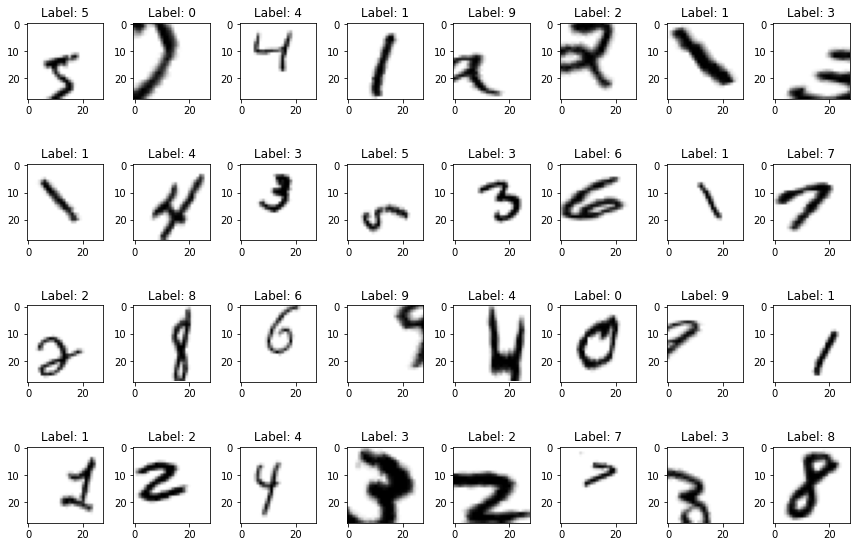

In [ ]:
# specify the arguments
rotation_range_val = 30
width_shift_val = 0.25
height_shift_val = 0.25
shear_range_val=45
zoom_range_val=[0.5,1.5]
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val,)
# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 4
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),Y_train.reshape(Y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
import numpy as np
X_train=np.expand_dims(X_train,axis=3)
X_train.shape
X_test=np.expand_dims(X_test,axis=3)
X_test.shape
resnet = ResNet(10)
resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=resnet.fit(datagen.flow((X_train/255, Y_train) 
         ),validation_data=datagen.flow(X_test/255, Y_test),
        
         steps_per_epoch=len(X_train) / 32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5323 - accuracy: 0.8371 - val_loss: 0.5428 - val_accuracy: 0.8276
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2715 - accuracy: 0.9153 - val_loss: 0.3314 - val_accuracy: 0.8955
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2244 - accuracy: 0.9293 - val_loss: 0.2246 - val_accuracy: 0.9236
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1933 - accuracy: 0.9375 - val_loss: 0.1711 - val_accuracy: 0.9444
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1766 - accuracy: 0.9431 - val_loss: 0.2611 - val_accuracy: 0.9179
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1652 - accuracy: 0.9472 - val_loss: 0.1666 - val_accuracy: 0.9459
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1501 - accuracy: 0.9521 - val_loss: 0.2907 -

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/modelnew/my_model')